Reprojecting images from a Geostationary projection
---------------------------------------------------

This example demonstrates Cartopy's ability to project images into the desired
projection on-the-fly. The image itself is retrieved from a URL and is loaded
directly into memory without storing it intermediately into a file. It
represents pre-processed data from the Spinning Enhanced Visible and Infrared
Imager onboard Meteosat Second Generation, which has been put into an image in
the data's native Geostationary coordinate system - it is then projected by
cartopy into a global Miller map.  (requires net connection)

In [1]:
try:
    from urllib2 import urlopen
except ImportError:
    from urllib.request import urlopen
from io import BytesIO

import cartopy.crs as ccrs
import matplotlib.pyplot as plt


In [2]:
def geos_image():
    """
    Return a specific SEVIRI image by retrieving it from a github gist URL.

    Returns
    -------
    img : numpy array
        The pixels of the image in a numpy array.
    img_proj : cartopy CRS
        The rectangular coordinate system of the image.
    img_extent : tuple of floats
        The extent of the image ``(x0, y0, x1, y1)`` referenced in
        the ``img_proj`` coordinate system.
    origin : str
        The origin of the image to be passed through to matplotlib's imshow.

    """
    url = ('https://gist.github.com/pelson/5871263/raw/'
           'EIDA50_201211061300_clip2.png')
    img_handle = BytesIO(urlopen(url).read())
    img = plt.imread(img_handle)
    img_proj = ccrs.Geostationary(satellite_height=35786000)
    img_extent = [-5500000, 5500000, -5500000, 5500000]
    return img, img_proj, img_extent, 'upper'



In [3]:
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Miller())
    ax.coastlines()
    ax.set_global()
    print('Retrieving image...')
    img, crs, extent, origin = geos_image()
    print('Projecting and plotting image (this may take a while)...')
    ax.imshow(img, transform=crs, extent=extent, origin=origin, cmap='gray')
    plt.show()


Retrieving image...
Projecting and plotting image (this may take a while)...


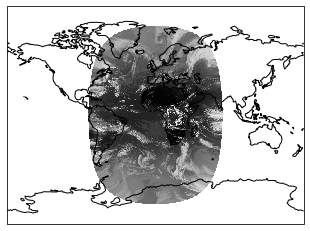

In [4]:
main()